# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [31]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

In [32]:
#on sépare les variables qualitatives des variables quantitatives 
# on fait d'abord un tableau avec les variables quantitatives
df1=data.iloc[:,1:7]
df1

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

In [33]:
# on fait ensuite un tableau avec les variables qualitatives 
df2=data.iloc[:,0:1]
df2

Unnamed: 0
0      Client 1
1      Client 2
2      Client 3
3      Client 4
4      Client 5
..          ...
435  Client 436
436  Client 437
437  Client 438
438  Client 439
439  Client 440

[440 rows x 1 columns]

In [34]:
#on fait afficher les valeurs numériques 
df = df1.values
print(values)

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


In [35]:
#on importe sklearn pour effectuer l'acp
import sklearn

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
#on centre et réduit 
Z = sc.fit_transform(df)
print(Z)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [39]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

6


In [40]:
# je calcule les valeurs propres
variance = acp.explained_variance_
print(variance)
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[2.65099857 1.70646229 0.74175057 0.56501435 0.28632709 0.06311455]
[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [41]:
# j'affiche les ratios de réprésentation des valeurs propres
print(acp.explained_variance_ratio_)

[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]


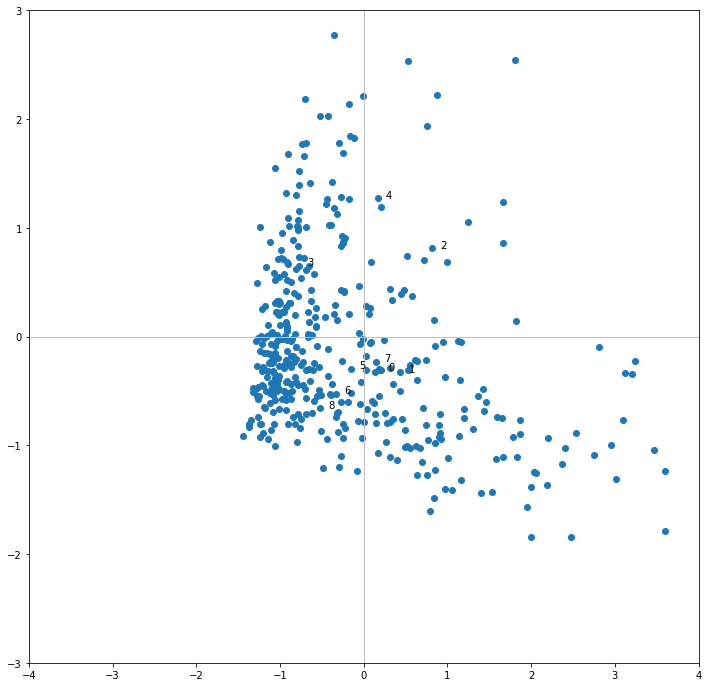

In [43]:
#maintenant, on peut étudier le graphique des individus, qui sera afficher à la suite 
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(9):
     plt.annotate(df1.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

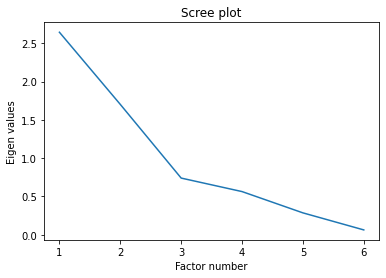

In [64]:
# scree plot : éboulis des valeurs propres
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

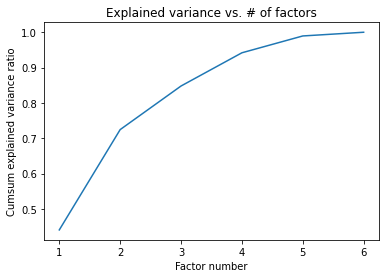

In [67]:
# cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#on peut remarquer sur le graphique et ensuite sur le test des batons brisés que le nombre de valeurs propres à garder est 2
#on projette alors sur deux axes 

In [66]:
# test des bâtons brisés
bk = 1/np.arange(n,0,-1)
#print(bk)
bk = np.cumsum(bk)
#print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    2.644974  2.450000
1    1.702584  1.450000
2    0.740065  0.950000
3    0.563730  0.616667
4    0.285676  0.366667
5    0.062971  0.166667


In [44]:
# contribution des individus dans l'inertie totale
# les carrés des distances à l’origine des individus
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df1.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


In [45]:
#À présent, on s'interesse aux individus 
# on regarde la qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(6):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df1.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.059091  0.147225
1      1  0.332872  0.190238
2      2  0.121024  0.122206
3      3  0.472434  0.332015
4      4  0.011117  0.649903
..   ...       ...       ...
435  435  0.093651  0.609412
436  436  0.133861  0.462130
437  437  0.864131  0.077791
438  438  0.705153  0.000755
439  439  0.586514  0.356281

[440 rows x 3 columns]


In [46]:
#on peut même vérifier la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [51]:
# contributions aux axes
ctr = coord**2
for j in range(6):
     ctr[:,j] = ctr[:,j]/(440*eigval[j])

print(pd.DataFrame({'id':df1.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.000032  0.000124
1      1  0.000162  0.000144
2      2  0.000565  0.000887
3      3  0.000521  0.000569
4      4  0.000024  0.002158
..   ...       ...       ...
435  435  0.000651  0.006584
436  436  0.000700  0.003754
437  437  0.010321  0.001443
438  438  0.000724  0.000001
439  439  0.001049  0.000990

[440 rows x 3 columns]


In [52]:
#et on peut également vérifier la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


In [53]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [55]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [57]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(5):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06974378  0.68886221 -0.6987601  -0.1777082  -0.02602031  0.        ]
 [ 0.88654635  0.10851973  0.05194998 -0.0654639   0.44179588  0.        ]
 [ 0.94206631 -0.19062039 -0.09323953  0.07957747 -0.1683631   0.        ]
 [ 0.08324992  0.79761402  0.15346028  0.57714209 -0.01492942  0.        ]
 [ 0.89227411 -0.33303614 -0.11716213  0.12894882 -0.18153322  0.        ]
 [ 0.40444082  0.65790499  0.45069909 -0.41450107 -0.16820333  0.        ]]


In [60]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df1.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0             Fresh  0.069744  0.688862
1              Milk  0.886546  0.108520
2           Grocery  0.942066 -0.190620
3            Frozen  0.083250  0.797614
4  Detergents_Paper  0.892274 -0.333036
5        Delicassen  0.404441  0.657905


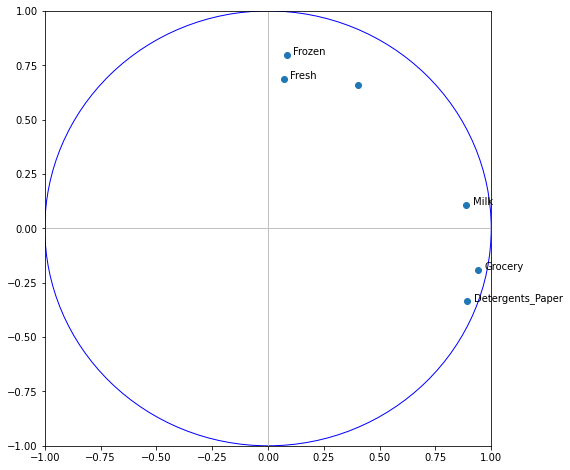

In [62]:
#on cherche à obtenir le cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#on fait l'affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(df1.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#on ajoute les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#on ajoute le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#et on fait le dernier affichage
plt.show()

on voit sur le cercle de correlation que les variables Frozen et Fresh ne sont pas correctement projetées sur le cercle, contrairement à Milk, grocery et detergents. On peut analyser les trois variables correctement projetée.

On peut clairement voir que les trois variables (Grocery, Milk et detergent) sont corrélées par rapport à l'axe 1. Contrairement, on voit que Fresh, Frozen sont corrélées par rapport à l'axe 2.

__Partie : Classification__

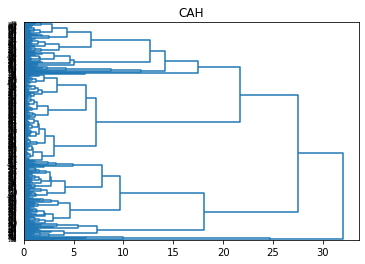

In [76]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

z = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(z,labels=df1.index,orientation='right',color_threshold=0)
plt.show()

En faisant afficher le dendrogramme, on peut décider de garder 5 classes. On voit qu'il y a énormément de valeurs, donc on prend le nombre de classes qui sont le plus facile à voir. On peut donc ensuite matérialiser ces cinq classes en les faisant afficher avec des couleurs

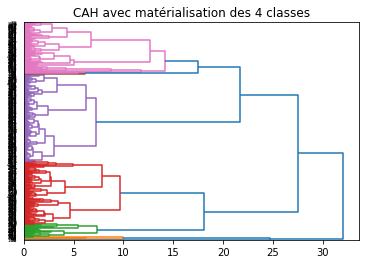

In [83]:
#matérialisation des 5 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(z,labels=df1.index,orientation='right',color_threshold=15)
plt.show()

In [88]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(z,t=7,criterion='distance')
print(groupes_cah)

[ 7  7  8 10 16  7  7  7  9  6  6 10 16 16 16 10  6  8 16  7 16 10 15 12
  8  7 10 10  5 16 16  9 16 16  9  7 16  6  6 13 15 16  6  4  7  5  6  1
  7  4 10  9 16  6 16  9  5  6 10  7  7  1  7  6 10  5  7 16 10  9 15 12
 10 15  7 10 10  4  9  9  9  6  7 10  7  2  1 12 10 16 10 15  5 11  6  9
  7  9  9 10  6  6  7 13 10 10  6  6  7  6 10  6 15 10 10 10 10  9 10 10
 10  9 10  7 16 13 15 16  7 16 10  9 10  9  9  9  7  7 16  9 16 16 16 10
  7  4  9  9 10 16 10  9 10  7  9  4  6 10  7  6  6  9 10  4  7  6  7  9
  9 10  6  5  7  4  9  6 13 16  7 10 16 14  6  3  9  7 10  7  6  6 15 10
  9  6  9 15 15  7 10  9  6  4  8  9  9  4  9  7  7  6 16  5  9  7  6  6
  4 10  8  9 10  7 10 10  9 10 16  9  9 10 15  7 16  9 16  9  9 10  9 13
 15 16 10 16  7  6  9 10  7 10  9  5 10 16  8 16  7 10 13 13  9 10 16 10
  6  8  6 16  6 10 10  9  7 16  9  9 16 15 10 16  9  7 13 15 13 16  9 15
 10 16  9  9 10  6 16  9 10  7  7  9 16  6  6  6  4  6  6 10  9  6 15 16
  4 10 10  6 10  9 10  5  9 10 10  7 16 11 10  9 15

À présent, nous pouvons faire une analyse K-means 

In [84]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)  # on choisit 5 avec l'étude du dessus
kmeans.fit(Z)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(df1.index[idk],kmeans.labels_[idk]))



[0 3 3 0 1 0 0 0 0 3 3 0 1 3 3 0 3 0 0 0 0 0 1 3 3 0 0 0 3 1 0 0 0 1 0 3 1
 3 3 1 1 0 3 3 3 3 3 2 3 3 0 0 1 3 0 0 2 3 0 0 0 2 0 3 0 2 0 3 0 0 1 1 0 1
 0 0 0 3 0 0 0 3 3 0 0 2 2 1 0 1 0 0 2 1 3 0 0 0 0 0 3 3 0 1 0 0 3 3 0 3 0
 3 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 3 0 0
 0 1 0 0 0 0 0 3 3 0 0 3 3 0 0 3 0 3 3 0 0 0 3 3 0 3 0 3 1 0 0 0 0 1 3 4 0
 0 0 0 3 3 0 0 0 3 0 1 1 3 0 0 3 3 1 0 0 3 0 0 0 3 0 2 0 0 3 3 3 0 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 3 3 0 0 0 0 0 2 0 1 3 1 0 0 1
 1 0 0 0 0 3 3 3 0 3 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 3 0 0
 0 0 0 0 0 3 3 3 3 3 3 0 0 3 0 1 3 0 0 3 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 3 0
 2 1 1 0 0 0 0 3 3 0 3 0 0 3 1 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 3 1 0 0 1 1 1 0 3 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 1 0 0 0 0 1
 3 0 0 0 0 0 1 0 0 3 0 3 0 3 0 0 0 0 1 3 1 0 0 0 1 0 0 0 1 1 3 0 0]
      0
0     0
0   270
0   269
0   267
0   263
..  ...
3   315
3    82
3   304
3   306
4   183

[440 rows 

In [85]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(Z),index = df1.index)
print(dist_data)

            0         1         2         3          4
0    1.175168  2.483028  7.256058  1.494666  18.898648
1    1.257251  2.639646  7.038271  1.122071  18.673363
2    2.657619  3.196380  7.389520  2.486800  16.820502
3    0.993834  1.722275  8.326653  2.606064  18.628519
4    1.937735  1.587568  7.695863  2.509552  17.499316
..        ...       ...       ...       ...        ...
435  3.327716  1.761411  7.323437  3.407134  17.497710
436  2.514133  1.207042  8.735545  3.755530  18.523290
437  4.418949  4.690032  3.924440  2.357273  18.748798
438  0.560789  2.428197  8.418934  2.465166  18.935351
439  0.790212  3.121516  8.504661  2.505248  19.727841

[440 rows x 5 columns]


In [90]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1  2   3  4
row_0                  
1       0   0  3   0  0
2       0   0  2   0  0
3       0   0  0   0  1
4       0   0  0  17  0
5       0   0  5   4  0
6       0   0  0  54  0
7      50   0  0  11  0
8       5   1  0   6  0
9      88   0  0   0  0
10     89   0  0   0  0
11      0   2  0   0  0
12      0   2  0   1  0
13      0   9  0   0  0
14      0   1  0   0  0
15      8  22  0   0  0
16     30  26  0   3  0

On peut remarquer qu'il y a une correspondance entre les groupes proposés par la CAH et la méthode des K-means.